# Reconstructing 1pctCO2 from abrupt-4xCO2

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from estimation import *
import matplotlib.gridspec as gridspec

In [2]:
directory = '../Processed_data/Global_annual_anomalies/'
experiments = {}
model_names = [ f.name for f in os.scandir(directory) if f.is_dir() and f.name !='.ipynb_checkpoints']
model_names.sort()
model_names.remove('CIESM')
model_names.remove('CAS-ESM2-0')
model_names.remove('MIROC-ES2H')
for model in model_names:
    modeldirectory = os.path.join(directory, model)
    modelexp_names = [ f.name for f in os.scandir(modeldirectory) if f.is_dir() and f.name !='.ipynb_checkpoints']
    experiments[model] = {}
    if '1pctCO2' in modelexp_names and 'abrupt-4xCO2' in modelexp_names:
        for exp in ['abrupt-4xCO2', '1pctCO2']:
            experiments[model][exp] = find_members(model, exp)
    else:
        print(model)
        model_names.remove(model)
experiments;

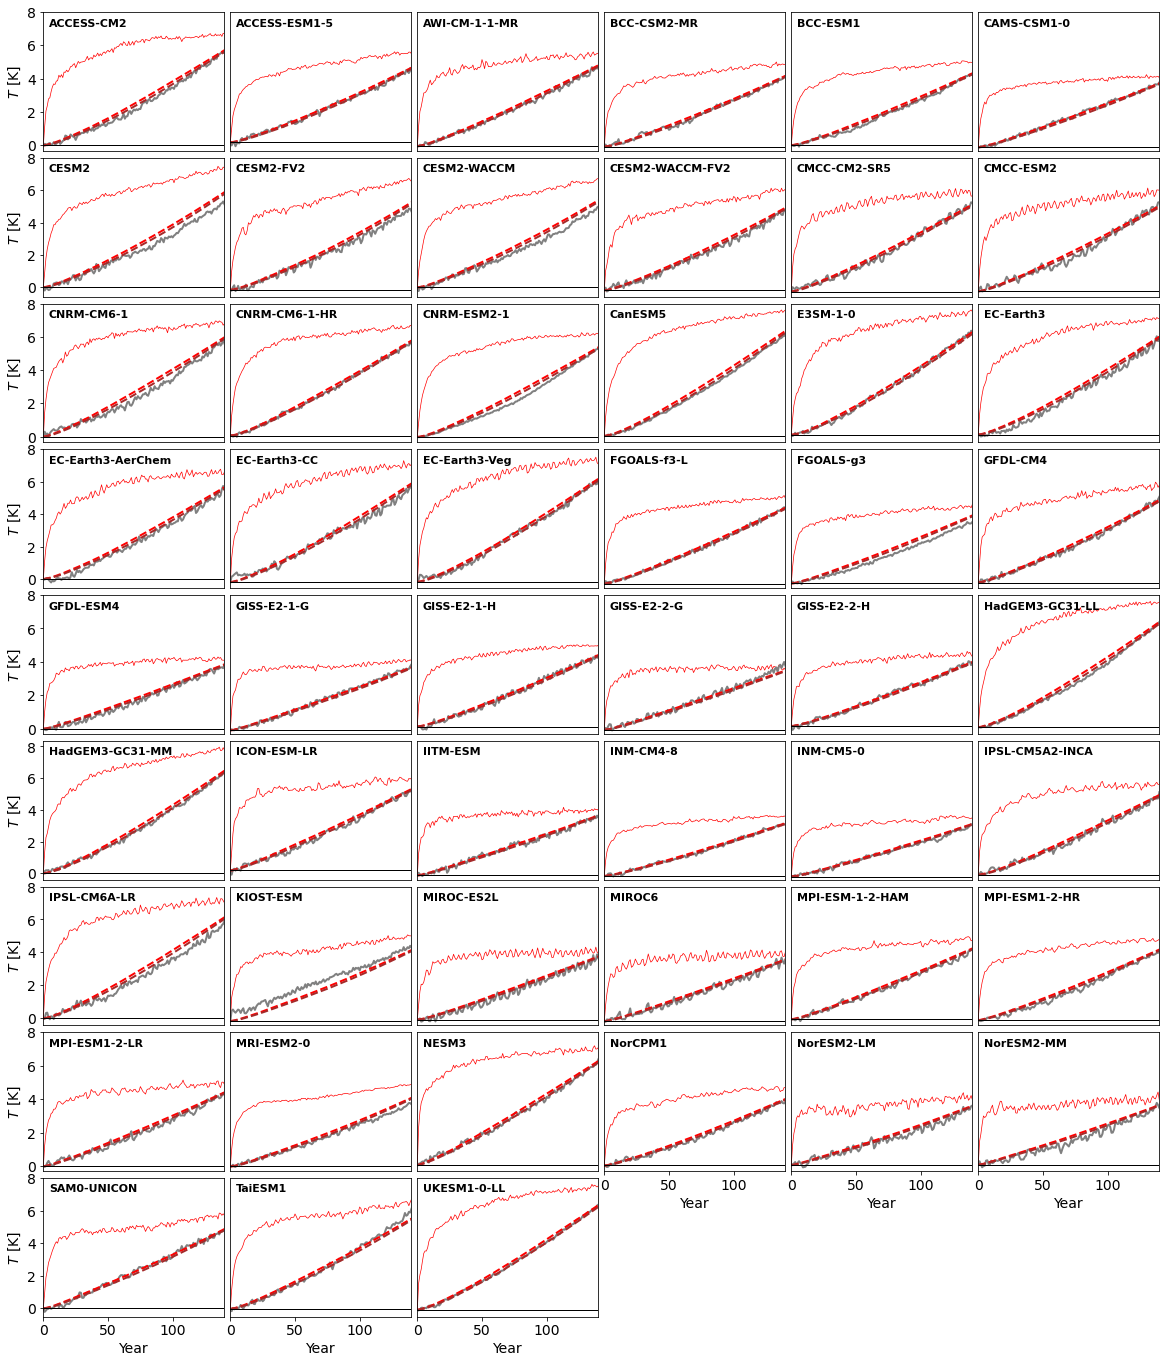

In [3]:

fig, axes = plt.subplots(ncols = 6, nrows = 9, figsize = (20,24))
axes = np.concatenate(axes)

#for (i, model) in enumerate([model_names[0]]):
for (i, model) in enumerate(model_names):
    modeldirectory = os.path.join(directory, model)
    modelexp_names = [ f.name for f in os.scandir(modeldirectory) if f.is_dir() and f.name !='.ipynb_checkpoints']
    members_1pctCO2 = find_members(model, '1pctCO2')
    members_4xCO2 = find_members(model, 'abrupt-4xCO2')
    if model == 'GISS-E2-1-G':
        members_4xCO2.remove('r1i1p1f3')
        members_1pctCO2.remove('r1i1p1f1') # has CO2 increase only up to doubling
        members_1pctCO2.remove('r102i1p1f1') # has CO2 increase only up to doubling
    member_mean_1pctCO2 = member_mean_tas(model, members_1pctCO2, length_restriction = 140, exp = '1pctCO2')
    member_mean_4xCO2 = member_mean_tas(model, members_4xCO2, length_restriction = 140, exp = 'abrupt-4xCO2')
    axes[i].plot(member_mean_4xCO2, color = 'red', linewidth = 0.7)
    axes[i].plot(member_mean_1pctCO2, color = 'gray', linewidth = 2)
    
    # scale forcing for 1pctCO2 according to etminan co2 formula:
    concfile = pd.read_excel("../Other_estimates/meinshausen_1pctCO2concentrations.xlsx", header=2)
    superlog_forcing = etminan_co2forcing(concfile['CO2']).values[:141]
    rec_1pctCO2 = np.cumsum(member_mean_4xCO2)/140
    rec_1pctCO2_superlogforcing = recT_from4xCO2(member_mean_4xCO2, superlog_forcing[140], superlog_forcing)
    axes[i].plot(rec_1pctCO2, '--', linewidth = 2, color = 'red')
    axes[i].plot(rec_1pctCO2_superlogforcing, '--', linewidth = 2, color = 'brown')
    axes[i].text(0.03, 0.9, model, transform=axes[i].transAxes, fontsize=11, fontweight = 'bold')

    if i in range((len(model_names)-6),len(model_names)):
        axes[i].set_xlabel('Year', fontsize = 14)
    else: 
        axes[i].axes.xaxis.set_visible(False)
    if i%6 == 0:
        axes[i].set_ylabel('$T$ [K]', fontsize = 14)
    else:
        axes[i].axes.yaxis.set_visible(False)
    axes[i].tick_params(axis='both', labelsize = 14)
    axes[i].set_yticks([0,2,4,6,8])
    axes[i].set_xlim(0,140)
    axes[i].axhline(y=0, color = 'black', linewidth = 1)
fig.delaxes(axes[-1]); fig.delaxes(axes[-2]); fig.delaxes(axes[-3]);
plt.subplots_adjust(hspace=0.05, wspace = 0.0325)
#plt.savefig('../Figures/superlog_rec1pctCO2_from_abrupt-4xCO2.pdf', format='pdf', dpi=600, bbox_inches="tight")
#'NESM3', 'FGOALS-g3', 'KIOST-ESM', 'CMCC-CM2-SR5' may have branch time errors

In [4]:
member_mean_1pctCO2

array([ 0.        , -0.04681846,  0.02618628,  0.12468728,  0.1257355 ,
        0.10360585,  0.12379694,  0.09402285,  0.19552197,  0.255932  ,
        0.26086081,  0.27936312,  0.21684716,  0.15734107,  0.16375908,
        0.26505528,  0.30549294,  0.2669961 ,  0.36598619,  0.51734525,
        0.56814303,  0.6360754 ,  0.65404413,  0.64273313,  0.62049807,
        0.67612816,  0.70806631,  0.76827439,  0.84284874,  0.91628395,
        0.95382351,  0.91243266,  0.9646978 ,  1.08034559,  1.09305332,
        1.19719902,  1.24286658,  1.27417094,  1.28178989,  1.28301561,
        1.32139643,  1.40855468,  1.45580992,  1.48216232,  1.55020314,
        1.61290698,  1.64952698,  1.70257808,  1.75642129,  1.74342179,
        1.74282879,  1.81904324,  1.92348305,  1.87436994,  1.86544699,
        1.96285476,  2.0154204 ,  2.03413073,  2.16977934,  2.26829774,
        2.21101332,  2.17865775,  2.21791789,  2.25902863,  2.37163755,
        2.44732689,  2.45898283,  2.48466064,  2.56250196,  2.64

## Reconstruct from abrupt-2xCO2

In [5]:
directory = '../Processed_data/Global_annual_anomalies/'
experiments = {}
model_names = [ f.name for f in os.scandir(directory) if f.is_dir() and f.name !='.ipynb_checkpoints']
model_names.sort()
model_names.remove('CIESM')
model_names.remove('CAS-ESM2-0')
model_names.remove('MIROC-ES2H')
for model in model_names:
    modeldirectory = os.path.join(directory, model)
    modelexp_names = [ f.name for f in os.scandir(modeldirectory) if f.is_dir() and f.name !='.ipynb_checkpoints']
    if '1pctCO2' in modelexp_names and 'abrupt-2xCO2' in modelexp_names:
        experiments[model] = {}
        for exp in ['abrupt-2xCO2', '1pctCO2']:
            experiments[model][exp] = find_members(model, exp)
model_names = list(experiments.keys())
experiments


{'CESM2': {'abrupt-2xCO2': ['r1i1p1f1'], '1pctCO2': ['r1i1p1f1']},
 'CNRM-CM6-1': {'abrupt-2xCO2': ['r1i1p1f2'], '1pctCO2': ['r1i1p1f2']},
 'CanESM5': {'abrupt-2xCO2': ['r1i1p2f1'],
  '1pctCO2': ['r1i1p1f1',
   'r1i1p2f1',
   'r2i1p1f1',
   'r2i1p2f1',
   'r3i1p1f1',
   'r3i1p2f1']},
 'GISS-E2-1-G': {'abrupt-2xCO2': ['r102i1p1f1',
   'r1i1p1f1',
   'r1i1p3f1',
   'r1i1p5f1'],
  '1pctCO2': ['r101i1p1f1', 'r102i1p1f1', 'r1i1p1f1', 'r1i1p3f1', 'r1i1p5f1']},
 'GISS-E2-1-H': {'abrupt-2xCO2': ['r1i1p1f1', 'r1i1p5f1'],
  '1pctCO2': ['r1i1p1f1']},
 'GISS-E2-2-G': {'abrupt-2xCO2': ['r1i1p1f1'], '1pctCO2': ['r1i1p1f1']},
 'GISS-E2-2-H': {'abrupt-2xCO2': ['r1i1p1f1'], '1pctCO2': ['r1i1p1f1']},
 'HadGEM3-GC31-LL': {'abrupt-2xCO2': ['r1i1p1f3'],
  '1pctCO2': ['r1i1p1f3', 'r2i1p1f3', 'r3i1p1f3', 'r4i1p1f3']},
 'IPSL-CM6A-LR': {'abrupt-2xCO2': ['r1i1p1f1'], '1pctCO2': ['r1i1p1f1']},
 'MIROC6': {'abrupt-2xCO2': ['r1i1p1f1'], '1pctCO2': ['r1i1p1f1']},
 'MRI-ESM2-0': {'abrupt-2xCO2': ['r1i1p1f1'],
  '1p

In [6]:
sorted_models = ['HadGEM3-GC31-LL', 'TaiESM1', 'CanESM5', 'CNRM-CM6-1', 'IPSL-CM6A-LR', 'CESM2', 'GISS-E2-1-H', 'GISS-E2-2-H', 'GISS-E2-1-G', 'GISS-E2-2-G', 'MIROC6', 'MRI-ESM2-0']

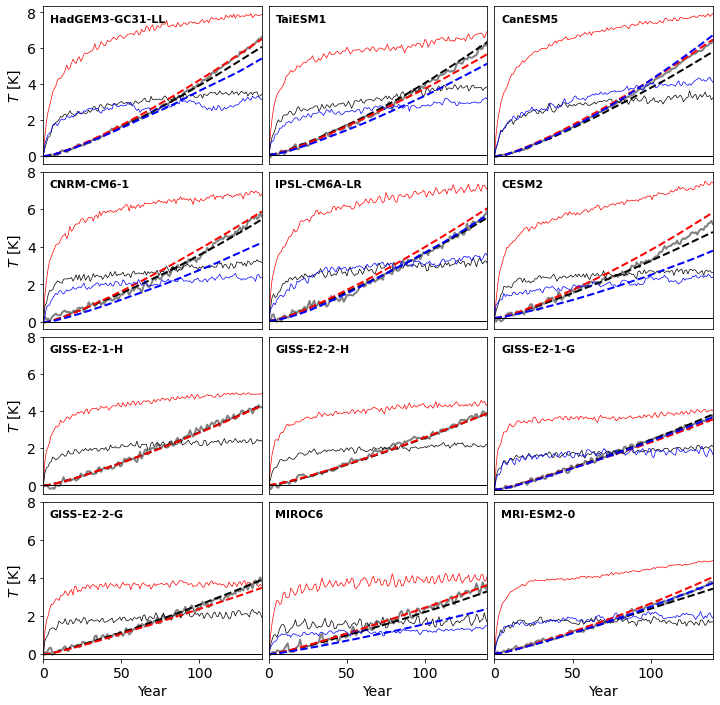

In [7]:
f4x = etminan_co2forcing(4*284.3169998547858)
f2x = etminan_co2forcing(2*284.3169998547858)

fig, axes = plt.subplots(ncols = 3, nrows = 4, figsize = (12,12))
axes = np.concatenate(axes)

for (i, model) in enumerate(sorted_models):
#for (i, model) in enumerate(model_names):
    modeldirectory = os.path.join(directory, model)
    modelexp_names = [ f.name for f in os.scandir(modeldirectory) if f.is_dir() and f.name !='.ipynb_checkpoints']
    members_1pctCO2 = find_members(model, '1pctCO2')
    members_2xCO2 = find_members(model, 'abrupt-2xCO2')
    members_4xCO2 = find_members(model, 'abrupt-4xCO2')
    modeldirectory = os.path.join(directory, model)
    modelexp_names = [ f.name for f in os.scandir(modeldirectory) if f.is_dir() and f.name !='.ipynb_checkpoints']
    if 'abrupt-0p5xCO2' in modelexp_names:
        members_0p5xCO2 = find_members(model, 'abrupt-0p5xCO2')
        member_mean_0p5xCO2 = member_mean_tas(model, members_0p5xCO2, length_restriction = 140, exp = 'abrupt-0p5xCO2')
    if model == 'GISS-E2-1-G':
        members_4xCO2.remove('r1i1p1f3')
        members_1pctCO2.remove('r1i1p1f1') # has CO2 increase only up to doubling
        members_1pctCO2.remove('r102i1p1f1') # has CO2 increase only up to doubling
    member_mean_1pctCO2 = member_mean_tas(model, members_1pctCO2, length_restriction = 140, exp = '1pctCO2')
    member_mean_2xCO2 = member_mean_tas(model, members_2xCO2, length_restriction = 140, exp = 'abrupt-2xCO2')
    member_mean_4xCO2 = member_mean_tas(model, members_4xCO2, length_restriction = 140, exp = 'abrupt-4xCO2')
    
    
    axes[i].plot(member_mean_4xCO2, color = 'red', linewidth = 0.7)
    axes[i].plot(member_mean_1pctCO2, color = 'gray', linewidth = 2)
    axes[i].plot(member_mean_2xCO2, color = 'black', linewidth = 0.7)
    
    # scale forcing for 1pctCO2 according to etminan co2 formula:
    concfile = pd.read_excel("../Other_estimates/meinshausen_1pctCO2concentrations.xlsx", header=2)
    superlog_forcing = etminan_co2forcing(concfile['CO2']).values[:141]
    rec_1pctCO2 = np.cumsum(member_mean_2xCO2)/140
    # use same function as for 4xCO2, but plug in 2xCO2 forcing instead (from year 70)
    rec_1pctCO2_superlogforcing = recT_from4xCO2(member_mean_2xCO2, superlog_forcing[70], superlog_forcing)
    rec4x_1pctCO2_superlogforcing = recT_from4xCO2(member_mean_4xCO2, superlog_forcing[140], superlog_forcing)
    #axes[i].plot(rec_1pctCO2*f4x/f2x)
    axes[i].plot(rec_1pctCO2_superlogforcing, '--', color = 'black', linewidth = 2)
    axes[i].plot(rec4x_1pctCO2_superlogforcing, '--', color = 'red', linewidth = 2)
    
    if 'abrupt-0p5xCO2' in modelexp_names:
        axes[i].plot( - member_mean_0p5xCO2, color = 'blue', linewidth = 0.7)
        rec0p5x_1pctCO2_superlogforcing = recT_from4xCO2(member_mean_0p5xCO2, -superlog_forcing[70], superlog_forcing)
        axes[i].plot(rec0p5x_1pctCO2_superlogforcing, '--', color = 'blue', linewidth = 2)
    
    axes[i].text(0.03, 0.9, model, transform=axes[i].transAxes, fontsize=11, fontweight = 'bold')

    if i in range((len(model_names)-3),len(model_names)):
        axes[i].set_xlabel('Year', fontsize = 14)
    else: 
        axes[i].axes.xaxis.set_visible(False)
    if i%3 == 0:
        axes[i].set_ylabel('$T$ [K]', fontsize = 14)
    else:
        axes[i].axes.yaxis.set_visible(False)
    axes[i].tick_params(axis='both', labelsize = 14)
    axes[i].set_yticks([0,2,4,6,8])
    axes[i].set_xlim(0,140)
    axes[i].axhline(y=0, color = 'black', linewidth = 1)
plt.subplots_adjust(hspace=0.05, wspace = 0.0325)
#plt.savefig('../Figures/superlog_rec1pctCO2_from_abrupt-allxCO2.pdf', format='pdf', dpi=600, bbox_inches="tight")

0.4777643149282242


(0.0, 140.0)

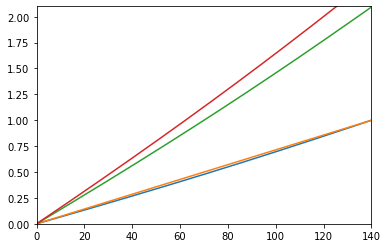

In [17]:
# plot forcing ratios used:
fig, ax = plt.subplots()

ax.plot(superlog_forcing/superlog_forcing[140])
ax.plot([0,140], [0,1])
print(superlog_forcing[70]/superlog_forcing[140])
ax.plot(superlog_forcing/superlog_forcing[70])
ax.plot(superlog_forcing/superlog_forcing[70]*1.13)

ax.set_ylim(0,2.1)
ax.set_xlim(0,140)

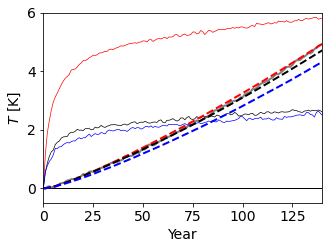

In [53]:
f4x = etminan_co2forcing(4*284.3169998547858)
f2x = etminan_co2forcing(2*284.3169998547858)

fig, ax = plt.subplots(figsize = (5,3.5))

model_alpha = 0.01

T4x_df = pd.DataFrame()
T1pct_df = pd.DataFrame()
T2x_df = pd.DataFrame()
T0p5x_df = pd.DataFrame()
rec2x_df = pd.DataFrame()
rec4x_df = pd.DataFrame()
rec0p5x_df = pd.DataFrame()

for (i, model) in enumerate(sorted_models):
    modeldirectory = os.path.join(directory, model)
    modelexp_names = [ f.name for f in os.scandir(modeldirectory) if f.is_dir() and f.name !='.ipynb_checkpoints']
    #if '1pctCO2' in modelexp_names and 'abrupt-2xCO2' in modelexp_names:
    members_1pctCO2 = find_members(model, '1pctCO2')
    members_2xCO2 = find_members(model, 'abrupt-2xCO2')
    members_4xCO2 = find_members(model, 'abrupt-4xCO2')
    modeldirectory = os.path.join(directory, model)
    modelexp_names = [ f.name for f in os.scandir(modeldirectory) if f.is_dir() and f.name !='.ipynb_checkpoints']
    if 'abrupt-0p5xCO2' in modelexp_names:
        members_0p5xCO2 = find_members(model, 'abrupt-0p5xCO2')
        member_mean_0p5xCO2 = member_mean_tas(model, members_0p5xCO2, length_restriction = 140, exp = 'abrupt-0p5xCO2')
    if model == 'GISS-E2-1-G':
        members_4xCO2.remove('r1i1p1f3')
        members_1pctCO2.remove('r1i1p1f1') # has CO2 increase only up to doubling
        members_1pctCO2.remove('r102i1p1f1') # has CO2 increase only up to doubling
    member_mean_1pctCO2 = member_mean_tas(model, members_1pctCO2, length_restriction = 140, exp = '1pctCO2')
    member_mean_2xCO2 = member_mean_tas(model, members_2xCO2, length_restriction = 140, exp = 'abrupt-2xCO2')
    member_mean_4xCO2 = member_mean_tas(model, members_4xCO2, length_restriction = 140, exp = 'abrupt-4xCO2')
    
    
    #ax.plot(member_mean_4xCO2, color = 'red', linewidth = 0.7, alpha = model_alpha)
    #ax.plot(member_mean_1pctCO2, color = 'gray', linewidth = 2, alpha = model_alpha)
    #ax.plot(member_mean_2xCO2, color = 'black', linewidth = 0.7, alpha = model_alpha)
    
    # add data to dfs, and compute ensemble means
    T4x_df[model] = member_mean_4xCO2
    T1pct_df[model] = member_mean_1pctCO2
    T2x_df[model] = member_mean_2xCO2
    T0p5x_df[model] = member_mean_0p5xCO2
    
    
    # scale forcing for 1pctCO2 according to etminan co2 formula:
    concfile = pd.read_excel("../Other_estimates/meinshausen_1pctCO2concentrations.xlsx", header=2)
    superlog_forcing = etminan_co2forcing(concfile['CO2']).values[:141]
    rec_1pctCO2 = np.cumsum(member_mean_2xCO2)/140
    # use same function as for 4xCO2, but plug in 2xCO2 forcing instead (from year 70)
    rec_1pctCO2_superlogforcing = recT_from4xCO2(member_mean_2xCO2, superlog_forcing[70], superlog_forcing)
    rec4x_1pctCO2_superlogforcing = recT_from4xCO2(member_mean_4xCO2, superlog_forcing[140], superlog_forcing)

    if 'abrupt-0p5xCO2' in modelexp_names:
        rec0p5x_1pctCO2_superlogforcing = recT_from4xCO2(member_mean_0p5xCO2, -superlog_forcing[70], superlog_forcing)

    rec2x_df[model] = rec_1pctCO2_superlogforcing
    rec4x_df[model] = rec4x_1pctCO2_superlogforcing
    rec0p5x_df[model] = rec0p5x_1pctCO2_superlogforcing

    ax.set_xlabel('Year', fontsize = 14)
    ax.set_ylabel('$T$ [K]', fontsize = 14)
    ax.tick_params(axis='both', labelsize = 14)
    ax.set_yticks([0,2,4,6,8])
    ax.set_xlim(0,140)
    ax.set_ylim(-0.5, 6)
    ax.axhline(y=0, color = 'black', linewidth = 1)

ax.plot(T4x_df.mean(axis=1), color = 'red', linewidth = 0.7)
ax.plot(T1pct_df.mean(axis=1), color = 'gray', linewidth = 2)
ax.plot(T2x_df.mean(axis=1), color = 'black', linewidth = 0.7)
ax.plot(-T0p5x_df.mean(axis=1), color = 'blue', linewidth = 0.7)

ax.plot(rec4x_df.mean(axis=1), '--', color = 'red', linewidth = 2)
ax.plot(rec2x_df.mean(axis=1), '--', color = 'black', linewidth = 2)
ax.plot(rec0p5x_df.mean(axis=1), '--', color = 'blue', linewidth = 2)

#plt.savefig('../Figures/ensemblemean_superlog_rec1pctCO2_from_abrupt-allxCO2.pdf', format='pdf', dpi=600, bbox_inches="tight")


In [25]:
T4x_df

,HadGEM3-GC31-LL,TaiESM1,CanESM5,CNRM-CM6-1,IPSL-CM6A-LR,CESM2,GISS-E2-1-H,GISS-E2-2-H,GISS-E2-1-G,GISS-E2-2-G,MIROC6,MRI-ESM2-0
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.112653,1.159750,1.229540,1.449418,1.371680,0.934243,1.295601,0.915039,1.214082,1.206931,0.947753,1.005145
2,1.946556,1.929499,1.994401,2.225361,2.196766,1.788570,1.873306,1.633834,2.028140,1.761640,1.622083,1.696067
3,2.450800,2.526762,2.526265,2.806360,2.598196,2.346304,2.065792,1.984216,2.242102,1.996933,2.096448,2.082950
4,2.808271,2.923823,3.014236,3.247748,2.955337,2.742320,2.323734,2.410656,2.391158,2.360095,2.485190,2.361887
...,...,...,...,...,...,...,...,...,...,...,...,...
136,7.886462,6.567917,8.045376,6.961104,6.939363,7.374077,4.897798,4.559348,4.045838,3.805405,4.150095,4.812140
137,7.837799,6.488452,8.123089,6.901845,7.254778,7.269426,4.903031,4.438130,4.112007,3.602159,4.178591,4.855993
138,7.796595,6.304696,7.965060,6.880860,7.260246,7.271455,4.913289,4.508188,4.117351,3.546785,3.860284,4.847986
139,7.843856,6.518213,8.056207,6.700209,7.144947,7.430606,4.898767,4.350272,4.170909,3.670364,3.835528,4.872328
